In [1]:
import networkx as nx

adj_matrix = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0]
]

G = nx.Graph()
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        if adj_matrix[i][j] == 1:
            G.add_edge(i + 1, j + 1)

vertex_cover = nx.approximation.min_weighted_vertex_cover(G)

print("Minimum number of vertices that need to be coloured red:", len(vertex_cover))
print("Vertices that should be coloured red:", vertex_cover)


Minimum number of vertices that need to be coloured red: 6
Vertices that should be coloured red: {1, 2, 3, 5, 6, 7}


Initial randomly generated graph


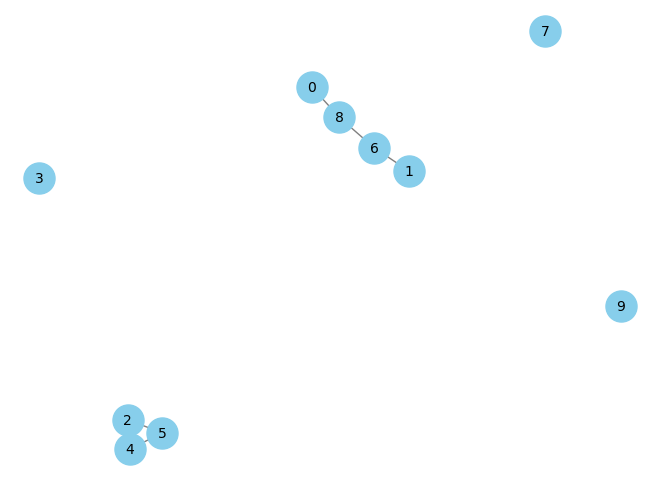

connected graph


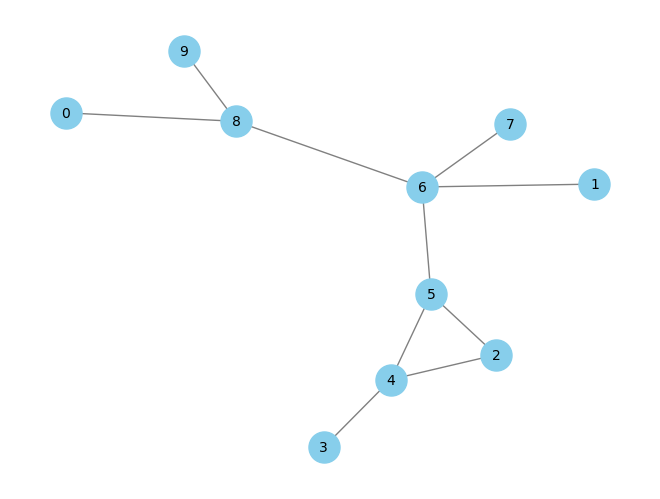

In [42]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_random_graph(n, p):
    adj_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                adj_matrix[i][j] = 1
                adj_matrix[j][i] = 1

    return adj_matrix


class Queue:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return len(self.items) == 0

    def enqueue(self, item):
        self.items.append(item)

    def dequeue(self):
        if self.is_empty():
            raise IndexError("empty")
        return self.items.pop(0)


def bfs(graph, start_node):
    visited = set()
    queue = Queue()
    queue.enqueue(start_node)

    while not queue.is_empty():
        node = queue.dequeue()
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.enqueue(neighbor)

    return visited

def is_connected(matrix):
    graph = nx.Graph(matrix)
    start_node = random.choice(list(graph.nodes()))
    visited = bfs(graph, start_node)

    return len(visited) == len(graph)

def find_components(adj_matrix):
    n = len(adj_matrix)
    visited = set()
    components = []

    graph = nx.Graph(adj_matrix)

    for node in range(n):
        if node not in visited:
            component = bfs(graph, node)
            components.append(component)
            visited.update(component)

    return components

def connect_graph(adj_matrix):
    components = find_components(adj_matrix)

    while len(components) > 1:
        comp1 = components[0]
        comp2 = components[1]
        u = random.choice(list(comp1))
        v = random.choice(list(comp2))

        adj_matrix[u][v] = 1
        adj_matrix[v][u] = 1

        G = nx.Graph(adj_matrix)
        components = list(nx.connected_components(G))

    return adj_matrix

def plot_graph(adj_matrix):
    G = nx.Graph(adj_matrix)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
    plt.show()

n = 10
p = 0.2

adj_matrix = generate_random_graph(n, p)
print("Initial randomly generated graph")
plot_graph(adj_matrix)

if not is_connected(adj_matrix):
    adj_matrix = connect_graph(adj_matrix)

print("connected graph")
plot_graph(adj_matrix)


In [43]:
print(adj_matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
